In [ ]:
#@title Campus Assignments by Algorithm

#@markdown I wanted a bit more information regarding possible matching algorithms, so I decided to create a simulation.

#@markdown Currently, there is a lottery system where each person gets randomly assigned a number, then each person chooses in the order of those numbers. If their first choice is full, they move to their second. If their second is full, they move to their third and so on.

#@markdown The current process can be seen at this link. https://www.med.unc.edu/md/curriculum/campus-assignment-process/

#@markdown This runs into obvious issues when the last few people must choose. Most likely, they'll get their last choice, even if person who got drawn first had this last choice as their second choice and would be happy there.

#@markdown Other algorithms take into account global happiness, solving this issue for those who draw last. One such algorithm is called Min-Cost, Max-Flow. This notebook will simulate the application phase campus match process for 190 random students with uniformly random preferences using both this algorithm and the current lottery system. 

#@markdown More info on the algorithm if interested but beyond the scope of what's necessary. 

#@markdown https://en.wikipedia.org/wiki/Minimum-cost_flow_problem 

#@markdown https://ocw.mit.edu/courses/6-046j-design-and-analysis-of-algorithms-spring-2012/7c2927794e61bd70c14c07728fa54375_MIT6_046JS12_lec13.pdf

#@markdown Click play on the left hand side to run Min-Cost Max-Flow once for a random student body. Feel free to click play multiple times to see the results change for a new randomized batch of 190 medical students.

#@markdown NOTE: You have to run the code blocks in order or you'll get an error.

import networkx as nx
import random

def campus_name_from_id(id):
  return ['central', 'asheville', 'wilmington', 'raleigh', 'greensboro', 'charlotte'][id-1]

def campus_id_from_name(name):
  return ['central', 'asheville', 'wilmington', 'raleigh', 'greensboro', 'charlotte'].index(name) + 1

def match_students_to_campuses(students, student_preferences):
    # Create a graph with students as the source and campuses as the sinks
    G = nx.DiGraph()
    G.add_nodes_from(students, demand=-1) # Students are the source node with a demand of -1
    G.add_node("central", demand=80)
    G.add_node("asheville", demand=35)
    G.add_node("wilmington", demand=27)
    G.add_node("raleigh", demand=27)
    G.add_node("greensboro", demand=12)
    G.add_node("charlotte", demand=9)
    
    # Add edges between students and campuses based on their preferences
    for student, preferences in enumerate(student_preferences):
        for i, campus in enumerate(preferences):
            G.add_edge(str(student), campus_name_from_id(campus), capacity=1, weight=i+1)
            
    # Compute the maximum flow in the graph
    flow_dict = nx.min_cost_flow(G)
    
    # Create a dictionary to store the matching
    matching = {}
    
    # Iterate through the flow dictionary to find the matching
    for student in students:
        for campus in ["central", "asheville", "wilmington", "raleigh", "greensboro", "charlotte"]:
            if flow_dict[student][campus] == 1:
                matching[student] = campus
                break

    return matching

def generate_preferences(n):
    preferences = []
    for i in range(n):
        preference = random.sample(range(1, 7), 6)
        preferences.append(preference)
    return preferences

students = [str(i) for i in range(190)]
preferences = generate_preferences(190)

#print(preferences)
matching = match_students_to_campuses(students, preferences)

def gen_id_dict(matching):
  return {student: campus_id_from_name(matching[student]) for student in matching}

id_match = gen_id_dict(matching)

def rank_match_by_student(matching, preferences):
    result = {}
    for student in matching:
      result[student] = preferences[int(student)].index(matching[student]) + 1
    
    return result

def amt_per_rank(result):
  counts_by_pref = {i + 1: 0 for i in range(6)}

  for student in result:
    counts_by_pref[result[student]] += 1

  return counts_by_pref

results = rank_match_by_student(id_match, preferences)

import matplotlib.pyplot as plt
from collections import Counter

def plot_bar_graph_mf(d):
    d = d.copy()
    labels = list(d.keys())
    values = list(d.values())
    labels, values = zip(*sorted(zip(labels, values)))
    x = range(len(labels))
    plt.bar(labels, values)
    for i, v in enumerate(values):
        plt.text(i+1, v + 0.5, str(v), ha="center")
    plt.xlabel("Preference number")
    plt.ylabel("Number of students")
    plt.title("Campus Match Results Using Min-Cost Max-Flow Algorithm")
    plt.show()   

plot_bar_graph_mf(amt_per_rank(results))

In [ ]:
#@title Current Random Lottery Algorithm Being Used

#@markdown As mentioned before, the current algorithm leads to more people getting later choices. Click play to see what happens when the current algorithm is used. Again, feel free to click play multiple times to see what happens if preferences are different.

#@markdown 

students = [str(i) for i in range(190)]
preferences = generate_preferences(190)

def lottery_match(preferences):
  slots = {1:80, 2:35, 3: 27, 4: 27, 5: 12, 6: 9}
  counts_by_pref = {i + 1: 0 for i in range(6)}
  assignment = {}

  for i, student in enumerate(preferences):
    for j, pref in enumerate(student):
      if slots[pref] > 0:
        slots[pref] -= 1
        counts_by_pref[j+1] += 1
        assignment[i] = pref
        break
  return counts_by_pref

def plot_bar_graph_lv(d):
    labels = list(d.keys())
    values = list(d.values())
    labels, values = zip(*sorted(zip(labels, values)))
    x = range(len(labels))
    plt.bar(labels, values)
    for i, v in enumerate(values):
        plt.text(i+1, v + 0.5, str(v), ha="center")
    plt.xlabel("Preference number")
    plt.ylabel("Number of students")
    plt.title("Campus Match Results Using Lottery Algorithm")
    plt.show()   

lottery_results = lottery_match(preferences)
plot_bar_graph_lv(lottery_results)

In [ ]:
#@title Side-by-side Comparison

#@markdown Click to run + graph a fresh trial of each algorithm being run.

#@markdown Limitations: This simulation assumes campus choices are uniform. Campus choices are not uniform. Additionally, the above trials assume there are 190 students choosing - this is not the case since some students have exemptions. This needs to be tested with real values before we can make any conclusions with complete certainty.

#@markdown With that said, it seems as though more students get their first choice and less students get choices 4-6 with Min-Cost Max-Flow compared to the current system.

students = [str(i) for i in range(190)]
preferences = generate_preferences(190)

matching = match_students_to_campuses(students, preferences)
id_match = gen_id_dict(matching)
results = rank_match_by_student(id_match, preferences)
amt_per = amt_per_rank(results)

lottery_results = lottery_match(preferences)

plot_bar_graph_mf(amt_per)

plot_bar_graph_lv(lottery_results)

In [ ]:
#@title Average Improvement Over n Trials
#@markdown To be extra sure, this next code will repeat what was done above hundreds of times.

#@markdown Over n trials, the average number more students who get each choice with Min-Cost Max-Flow vs Random Lottery. 
number_of_trials = 100 #@param {type:"slider", min:0, max:500, step:1}

def run_trial():
  students = [str(i) for i in range(190)]
  preferences = generate_preferences(190)

  matching = match_students_to_campuses(students, preferences)
  id_match = gen_id_dict(matching)
  results = rank_match_by_student(id_match, preferences)
  amt_per = amt_per_rank(results)

  lottery_results = lottery_match(preferences)

  return {i+1: amt_per[i+1] - lottery_results[i+1] for i in range(6)}

def n_trials(n):
  results = {i + 1: 0 for i in range(6)}
  for _ in range(n):
    trial = run_trial()
    results = {i+1:results[i+1]+trial[i+1] for i in range(6)}

  return {i+1:results[i+1]/n for i in range(6)}

def plot_bar_graph_improvement(n):
    d = n_trials(n)
    labels = list(d.keys())
    values = list(d.values())
    labels, values = zip(*sorted(zip(labels, values)))
    x = range(len(labels))
    plt.bar(labels, values)
    for i, v in enumerate(values):
        plt.text(i+1, v + 0.5, str(round(v, 3)), ha="center")
    plt.xlabel("Preference number")
    plt.ylabel("Number of students")
    plt.title("Average improvement over " + str(n) + " trials")
    plt.show() 

plot_bar_graph_improvement(number_of_trials)



In [ ]:
#@title Changing Costs Can Optimize Results

#@markdown By altering costs, philosophical decisions can be made regarding match results. For example, by adding cost to the third and higher choices, students are less likely to get matched to these campuses.

#@markdown Feel free to modify weights to see how results change. Important note: the weights must be increasing, or you'll get an error.

first_choice_weight = 1 #@param {type:"integer"}
second_choice_weight = 2 #@param {type:"integer"}
third_choice_weight = 3 #@param {type:"integer"}
fourth_choice_weight = 6 #@param {type:"integer"}
fifth_choice_weight = 7 #@param {type:"integer"}
sixth_choice_weight = 8 #@param {type:"integer"}

def match_students_to_campuses_custom(students, student_preferences, weights):
    # Create a graph with students as the source and campuses as the sinks
    G = nx.DiGraph()
    G.add_nodes_from(students, demand=-1) # Students are the source node with a demand of -1
    G.add_node("central", demand=80)
    G.add_node("asheville", demand=35)
    G.add_node("wilmington", demand=27)
    G.add_node("raleigh", demand=27)
    G.add_node("greensboro", demand=12)
    G.add_node("charlotte", demand=9)
    
    # Add edges between students and campuses based on their preferences
    for student, preferences in enumerate(student_preferences):
        for i, campus in enumerate(preferences):
            G.add_edge(str(student), campus_name_from_id(campus), capacity=1, weight=weights[i])
            
    # Compute the maximum flow in the graph
    flow_dict = nx.min_cost_flow(G)
    
    # Create a dictionary to store the matching
    matching = {}
    
    # Iterate through the flow dictionary to find the matching
    for student in students:
        for campus in ["central", "asheville", "wilmington", "raleigh", "greensboro", "charlotte"]:
            if flow_dict[student][campus] == 1:
                matching[student] = campus
                break

    return matching
  
custom_weights = [first_choice_weight, second_choice_weight, third_choice_weight, fourth_choice_weight, fifth_choice_weight, sixth_choice_weight]

def run_trial(single=False):
  students = [str(i) for i in range(190)]
  preferences = generate_preferences(190)

  matching = match_students_to_campuses_custom(students, preferences, custom_weights)
  id_match = gen_id_dict(matching)
  results = rank_match_by_student(id_match, preferences)
  amt_per = amt_per_rank(results)
  if single:
    return amt_per

  lottery_results = lottery_match(preferences)

  return {i+1: amt_per[i+1] - lottery_results[i+1] for i in range(6)}

plot_bar_graph_mf(run_trial(single=1))

number_of_trials = 100 #@param {type:"slider", min:0, max:500, step:1}

def n_trials(n):
  results = {i + 1: 0 for i in range(6)}
  for _ in range(n):
    trial = run_trial()
    results = {i+1:results[i+1]+trial[i+1] for i in range(6)}

  return {i+1:results[i+1]/n for i in range(6)}

def plot_bar_graph_improvement(n):
    d = n_trials(n)
    labels = list(d.keys())
    values = list(d.values())
    labels, values = zip(*sorted(zip(labels, values)))
    x = range(len(labels))
    plt.bar(labels, values)
    for i, v in enumerate(values):
        plt.text(i+1, v + 0.5, str(round(v, 3)), ha="center")
    plt.xlabel("Preference number")
    plt.ylabel("Number of students")
    plt.title("Average improvement over " + str(n) + " trials")
    plt.show() 

plot_bar_graph_improvement(number_of_trials)



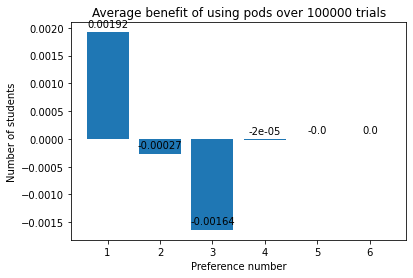

In [ ]:
#@title Benefit of Pods
#@markdown There should be no benefit for pods in terms of match outcomes. As trials approach infinity, the relative benefit should approach zero.

#@markdown I have run the code over 100000 trials, showing a .2% benefit for pods, which is likely a statistical artifact, providing evidence for the no benefit hypothesis.

#@markdown I highly suggest not running this code and just looking at the results. 100000 trials will run for about 1 hr.
number_of_pods = 20 #@param {type:"slider", min:0, max:50, step:1}
number_of_trials = 100000 #@param {type:"slider", min:0, max:100000, step:1}

students = [str(i) for i in range(190 - 3 * number_of_pods)]
pods = [str(i) for i in range(190 - 3 * number_of_pods, 190 - 2 * number_of_pods)]
preferences_s = generate_preferences(190 - 3 * number_of_pods)
preferences_p = generate_preferences(number_of_pods)

def match_students_to_campuses(students, pods, student_preferences, pod_preferences):
    # Create a graph with students as the source and campuses as the sinks
    G = nx.DiGraph()
    G.add_nodes_from(students, demand=-1) # Students are the source node with a demand of -1
    G.add_nodes_from(pods, demand=-3)
    G.add_node("central", demand=80)
    G.add_node("asheville", demand=35)
    G.add_node("wilmington", demand=27)
    G.add_node("raleigh", demand=27)
    G.add_node("greensboro", demand=12)
    G.add_node("charlotte", demand=9)
    
    # Add edges between students and campuses based on their preferences
    for student, preferences in enumerate(student_preferences):
        for i, campus in enumerate(preferences):
            G.add_edge(str(student), campus_name_from_id(campus), capacity=1, weight=i+1)

    for pod, preferences in enumerate(pod_preferences):
        pod2 = 160 + pod
        for i, campus in enumerate(preferences):
            G.add_edge(str(pod2), campus_name_from_id(campus), capacity=3, weight=i+1)

    # Compute the maximum flow in the graph
    flow_dict = nx.min_cost_flow(G)
    
    # Create a dictionary to store the matching
    matching = {}
    
    # Iterate through the flow dictionary to find the matching
    for student in students:
        for campus in ["central", "asheville", "wilmington", "raleigh", "greensboro", "charlotte"]:
            if flow_dict[student][campus] >= 1:
                matching[student] = campus
                break

    for student in pods:
        for campus in ["central", "asheville", "wilmington", "raleigh", "greensboro", "charlotte"]:
            if flow_dict[student][campus] >= 1:
                matching[student] = campus
                break

    return matching

def rank_match_by_student_pods(matching, preferences):
    result = {}
    for student in matching:
      if student in students:
        result[student] = preferences[int(student)].index(matching[student]) + 1

    result_pod = {}
    for student in matching:
      if student in pods:
        result_pod[student] = preferences[int(student)].index(matching[student]) + 1
    
    return result, result_pod

def run_trial(single=False):
  students = [str(i) for i in range(190)]
  preferences = generate_preferences(190)

  matching = match_students_to_campuses_custom(students, preferences, custom_weights)
  id_match = gen_id_dict(matching)
  results_student, results_pod = rank_match_by_student_pods(id_match, preferences)
  amt_per_students, amt_per_pods = amt_per_rank(results_student), amt_per_rank(results_pod)
  if single:
    return amt_per_students, amt_per_pods

  amt_per_students_norm = {i:amt_per_students[i]/(190-3*number_of_pods) for i in amt_per_students}
  amt_per_pods_norm = {i:amt_per_pods[i]/(number_of_pods) for i in amt_per_pods}

  return {i+1: amt_per_students_norm[i+1] - amt_per_pods_norm[i+1] for i in range(6)}

run_trial(single=0)

def n_trials(n):
  results = {i + 1: 0 for i in range(6)}
  for _ in range(n):
    trial = run_trial()
    results = {i+1:results[i+1]+trial[i+1] for i in range(6)}

  return {i+1:results[i+1]/n for i in range(6)}

def plot_bar_graph_improvement(n):
    d = n_trials(n)
    labels = list(d.keys())
    values = list(d.values())
    labels, values = zip(*sorted(zip(labels, values)))
    x = range(len(labels))
    plt.bar(labels, values)
    for i, v in enumerate(values):
        plt.text(i+1, v + 0.0001, str(round(v, 5)), ha="center")
    plt.xlabel("Preference number")
    plt.ylabel("Number of students")
    plt.title("Average benefit of using pods over " + str(n) + " trials")
    plt.show() 

plot_bar_graph_improvement(number_of_trials)